We wanted to understand how the data looked like, therefore we performed some descriptive analysis. Firstly, we were happy to see that the distribution of comments by category is constant, if it was very biased we should have kept that in mind while assessing the results.

In [17]:
import pandas as pd

seed = 123

df_complete = pd.read_json(path_or_buf = 'data/amazon_step1.json', lines=True)
df = pd.DataFrame(df_complete[['asin', 'category','reviewText']])

categories= pd.get_dummies(df['category'])
print(categories.sum())

del df_complete

Amazon_Instant_Video           4000
Apps_for_Android               4000
Automotive                     4000
Baby                           4000
Beauty                         4000
Books                          4000
CDs_and_Vinyl                  4000
Cell_Phones_and_Accessories    4000
Clothing_Shoes_and_Jewelry     4000
Digital_Music                  4000
Electronics                    4000
Grocery_and_Gourmet_Food       4000
Health_and_Personal_Care       4000
Home_and_Kitchen               4000
Kindle_Store                   4000
Movies_and_TV                  4000
Musical_Instruments            4000
Office_Products                4000
Patio_Lawn_and_Garden          4000
Pet_Supplies                   4000
Sports_and_Outdoors            4000
Tools_and_Home_Improvement     4000
Toys_and_Games                 4000
Video_Games                    4000
dtype: int64


All the information was safely loaded, another good thing to see.

In [18]:
df.isnull().any().any()

False

The number of comments for every product on the contrary is not constant.

In [19]:
df['asin'].value_counts()

B000A0VOD2    88
B003VWJ2K8    59
B00I3MPDP4    52
B00DAHSVYC    50
B0002E1G5C    50
B00C88DV6M    49
B00I3MMN4I    47
B003VWKPHC    47
B000F0BVYE    41
B00APE00H4    40
B000CITK8S    40
B0002F7K7Y    40
B00I3MNGCG    40
B002XHJF9A    38
B00I3MNVBW    35
B003AYUWMO    32
B00CDBTQCW    32
B00FAPF5U0    31
B009FZFONO    30
B005544TRQ    30
B0002H0A3S    29
B008QTTGGG    29
B0002E2KPC    29
B007TG7HFO    29
B004MWZLYC    28
B000IDSLOG    27
B00B8P8O9K    27
B0018TIADQ    27
B0010T3QT2    27
B0009G1E0K    27
              ..
B005EGXHU0     1
B0002MJTZ8     1
B009JCVZ90     1
B001DN0UPI     1
B00ECTU6TA     1
1584795816     1
B00KB8FGSM     1
B0085GI1S4     1
B003ZXCAAC     1
1481056832     1
B001AS696K     1
B00AIQ1NXY     1
B00005JON3     1
B000FJR0MM     1
B009YU718Q     1
B0037N32VG     1
B000GBOMNE     1
B00EOH88TK     1
B0072FSMFG     1
B000E4AR8C     1
B008QBGXQK     1
B0002DUSY8     1
B00CJFVT9A     1
B000NOKEYU     1
B0018I8Q1I     1
B003H054RY     1
B002CJCEJW     1
B001BPFCOC    

We noticed that some products were assigned to different categories in different comments. 

In [20]:
# Group comments by product and category assigned
united = df.groupby(['asin', 'category'])['reviewText'].apply(' '.join).reset_index()
print(united['asin'].value_counts())

B002SIR91A    3
B00004YKUI    2
B000003TAW    2
B0000C421G    2
B000002P22    2
B00AND5YIM    2
B000002GK1    2
B000005HCM    2
B00005NP1D    2
B009UNGYHG    2
B00FAX6XQC    2
B000002G8H    2
B00004T9UF    2
B0002TOZ1E    2
B004XMXXWI    2
B007ZF9KLI    2
B005FMLZQQ    2
B00BGA9WK2    2
B002TDP4D4    2
B000002KBA    2
B00IAZXJ0U    2
B000XECJES    2
B000002GX2    2
B00000J7JO    2
B0015AARJI    2
B005GYGD7O    2
B004AOLA1A    2
B000001F6A    2
B00GQL0JD0    2
B000002IIQ    2
             ..
B006LY4K7S    1
B00008BLCI    1
B00IA6ZZEM    1
B000002LJO    1
B002ZIN9DU    1
B007TGDXNO    1
B005FC6T08    1
B002QAC66I    1
B004722DMU    1
B0089ZTVGM    1
B0053BSNZU    1
B000LPJR4O    1
B009LXYB3Y    1
630027148X    1
B000XZSVQC    1
B000GZ1BNE    1
B000UEA96G    1
B008VSY4LO    1
B000002L5R    1
B00004SACQ    1
B0037UWNR8    1
B005CMGZ9G    1
B00CBNO8MK    1
B00004RA45    1
B008CG1HZQ    1
B002UKH434    1
B0058XH5D4    1
B004D8NZ52    1
B002DYJ0K2    1
B003AM711G    1
Name: asin, dtype: int64

Since it looks like it happened several times and actually on 'amazon.com' some products are indeed assigned to several categories we believe that it was not a mistake, but we cannot be sure. We thought a lot on how to deal with this issue.<br>

- We could have ignored the issue obviously, but this might have led to worse results.<br>
- We could have modified the 'score' function so that if the predicted category was any of the categories assigned to the product if would be classified as a true prediction. This is quite a lengthy procedure though and we could not implement it to predict the categories of the 'unseen' data because in this case we would be using information form the 'asin' feature and not only the 'reviewText' one.<br>
- We could have removed those products from the analysis by dropping the related comments. <br>

The dataset is very big anyway and we did not manage to use all of it, we decided to go for the third option and drop the comments related to these products: we expected them to be similar (they are describing the same items) but, their category being different, they would probably add a lot of noise to the results and it might bias our models.<br>
You can see in the following code how we did it and that the new distribution of comments by category is still pretty even.

In [21]:
old = 0

product_numbers = []

# create the list of the products with more than one category assigned
for _,row in united.iterrows():
    
    if(old == row['asin']):
        
        product_numbers.append(row['asin'])
        
    old = row['asin']

    
indexes=[]

# find what are the comments related to the products found above
for i,df_row in df.iterrows():
    
    if df_row['asin'] in product_numbers:
        
        indexes.append(i)

# drop the ambiguous observations
df.drop(df.index[[indexes]], inplace = True)
categories= pd.get_dummies(df['category'])
print(categories.sum())

Amazon_Instant_Video           4000
Apps_for_Android               3939
Automotive                     3954
Baby                           4000
Beauty                         4000
Books                          3918
CDs_and_Vinyl                  3646
Cell_Phones_and_Accessories    3853
Clothing_Shoes_and_Jewelry     3938
Digital_Music                  3129
Electronics                    3900
Grocery_and_Gourmet_Food       4000
Health_and_Personal_Care       3991
Home_and_Kitchen               3998
Kindle_Store                   3884
Movies_and_TV                  3991
Musical_Instruments            3999
Office_Products                3997
Patio_Lawn_and_Garden          3996
Pet_Supplies                   4000
Sports_and_Outdoors            3948
Tools_and_Home_Improvement     3997
Toys_and_Games                 3990
Video_Games                    3934
dtype: int64


At this point we started the procedure to build the tfidf representation of our data. We followed the same approach of the second demo. We will only apply it to 5000 comments to lighten the computational burden.

In [22]:
df = df.ix[:5000,:]
# All the special characters were removed from the sample
df_refined=[]
for item in df.ix[:,2]:
    df_refined.append (item.replace('\r',' ').replace('/n',' ').replace('.',' ')\
                           .replace(',',' ').replace('(',' ').replace(')',' ')\
                           .replace("'s",' ').replace('"',' ').replace('!',' ')\
                           .replace('?',' ').replace("'",' ').replace('>',' ')\
                           .replace('$',' ').replace('-',' ').replace(';',' ')\
                           .replace(':',' ').replace('/',' ').replace('#',' '))
    

from gensim import corpora
from gensim.parsing.preprocessing import STOPWORDS

tester = 1
documents = df_refined
print ('original: ',documents[tester], '\n')

original:  This was a very good book  It kept me excited about what was gonna happen next  I read the whole series  



In [23]:
# remove the stopwords
documents_no_stop = [[word for word in document.lower().split() if word not in STOPWORDS]
         for document in documents]

print ('tokenize and remove stop words: ',documents_no_stop[tester], '\n')
del documents

tokenize and remove stop words:  ['good', 'book', 'kept', 'excited', 'gonna', 'happen', 'read', 'series'] 



In [24]:
# remove words that appear only once
from collections import defaultdict
threshold = 1 # frequency threshold
frequency = defaultdict(int)
for text in documents_no_stop:
    for token in text:
        frequency[token] += 1

documents_no_stop_no_unique = [[token for token in text if frequency[token] > threshold] 
                               for text in documents_no_stop]

print ('remove unique words: ',documents_no_stop_no_unique[tester], '\n')
del documents_no_stop

remove unique words:  ['good', 'book', 'kept', 'excited', 'gonna', 'happen', 'read', 'series'] 



In [25]:
# remove all numerics and tokens with numbers
import re
def hasNumbers(inputString):
    return bool(re.search(r'\d', inputString))
documents_no_stop_no_unique_no_numeric = [[token for token in text if not (hasNumbers(token)) ] 
                                          for text in documents_no_stop_no_unique]

print ('remove numerics: ',documents_no_stop_no_unique_no_numeric[tester], '\n')
del documents_no_stop_no_unique

remove numerics:  ['good', 'book', 'kept', 'excited', 'gonna', 'happen', 'read', 'series'] 



In [26]:
# lemmattizing tokens (better than stemming by taking word context into account)
from nltk.stem import WordNetLemmatizer
from nltk import download

download('wordnet')

lemmatizer = WordNetLemmatizer()

documents_no_stop_no_unique_no_numeric_lemmatize = [[lemmatizer.lemmatize(token) for token in text] 
                                                    for text in documents_no_stop_no_unique_no_numeric]

print ('lemmatize: ',documents_no_stop_no_unique_no_numeric_lemmatize[tester], '\n')
del documents_no_stop_no_unique_no_numeric

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/INTRANET/mpietrob/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
lemmatize:  ['good', 'book', 'kept', 'excited', 'gonna', 'happen', 'read', 'series'] 



In [27]:
# remove non-english words
import enchant
eng_dic = enchant.Dict("en_US")

documents_no_stop_no_unique_no_numeric_lemmatize_english = [[token for token in text if (eng_dic.check(token)) ] 
                                                            for text in documents_no_stop_no_unique_no_numeric_lemmatize]

print ('no english: ',documents_no_stop_no_unique_no_numeric_lemmatize_english[tester], '\n')
del documents_no_stop_no_unique_no_numeric_lemmatize

no english:  ['good', 'book', 'kept', 'excited', 'gonna', 'happen', 'read', 'series'] 



In [28]:
# create ready corpus
ready_corpus = documents_no_stop_no_unique_no_numeric_lemmatize_english
print (len(ready_corpus))

4891


In [29]:
# convert the corpus into bag of words 
from gensim import models, corpora, matutils
dictionary = corpora.Dictionary(ready_corpus)

corpus_bow = [dictionary.doc2bow(comment) for comment in ready_corpus]

In [30]:
tfidf_transformer = models.TfidfModel(corpus_bow, normalize=True)

# apply tfidf transformation to the bow corpus
corpus_tfidf = tfidf_transformer [corpus_bow]

print(len(corpus_tfidf.corpus))
for doc in corpus_tfidf:
    print(doc)
    break

4891
[(0, 0.17996691278121105), (1, 0.5135183464701751), (2, 0.17117278215672507), (3, 0.15305649741047261), (4, 0.07967420207014264), (5, 0.1192683506114999), (6, 0.10305435112155285), (7, 0.11181330176121114), (8, 0.27375423788415065), (9, 0.093062859743263), (10, 0.3676189464924521), (11, 0.08659910778604787), (12, 0.06040101243170066), (13, 0.04006451933863254), (14, 0.33536553813951325), (15, 0.09870764317171522), (16, 0.20391533856226154), (17, 0.10471539253230035), (18, 0.18579905381600909), (19, 0.05798354824923597), (20, 0.15125328080601422), (21, 0.14798198258669673), (22, 0.09941726886573277), (23, 0.16768276906975663), (24, 0.10953939801820427), (25, 0.08988019670567192), (26, 0.08215399185183576), (27, 0.11174941309419181), (28, 0.14507495889352984), (29, 0.02419540145026327), (30, 0.14008148684527041)]


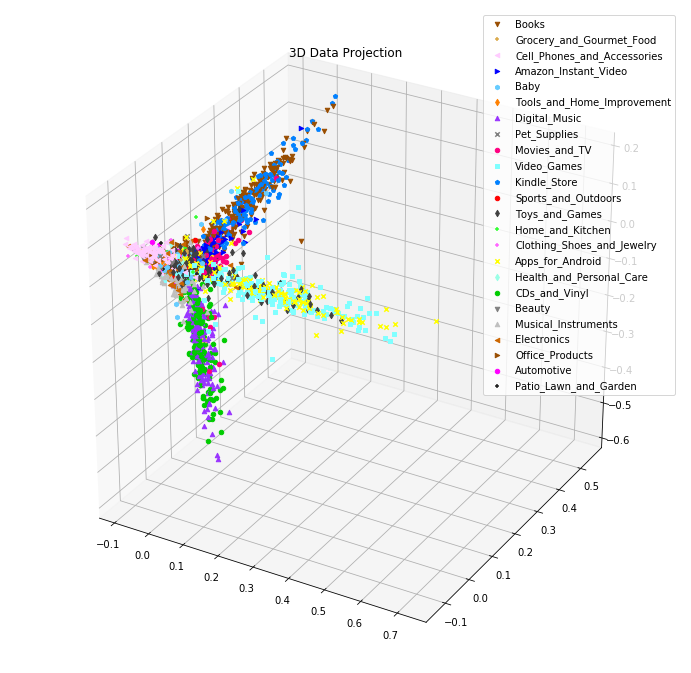

In [31]:
# convert to a sparse and compatible format for dimensionality reduction using sklearn
sparse_corpus_tfidf = matutils.corpus2csc(corpus_tfidf)
sparse_corpus_tfidf_transpose = sparse_corpus_tfidf.transpose()

# visualize the tf-idf corpus using kernel PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

kpca = KernelPCA(n_components = 3, kernel="cosine", random_state=seed)
corpus_tfidf_kpca = kpca.fit_transform(sparse_corpus_tfidf_transpose)

#RENAMED FOR EASE
X = corpus_tfidf_kpca

#CREATE DICTIONARY TO ASSIGN COLORS
categories = df.ix[:,1].unique()

#REINDEX OUTPUT TO COMPARE WITH LABELS
reindexed = df.ix[:,1].reset_index()

#CREATE DICTIONARY TO ASSIGN VALUES TO OCCURRENCE VECTOR AND COLORS
together = zip(categories,np.arange(0,24))
locator = dict(together)
occurred =  np.zeros(24)

reds = [1, 0.6, 0.86, 1, 0,0.4,  1,0.6,0.5,  1,0.5,  0,0.25,0.2,  1,1,0.6,  0,0.5,0.75,0.8,0.6,1,0.13]
greens =[0,0.3, 0.67,0.8,0,0.8,0.5,0.2,0.5,  0,  1,0.5,0.25,  1,0.4,1,  1,0.8,0.5,0.75,0.4,0.3,0,0.13]
blues = [0, 0, 0.3, 1,   1,  1,  0,  1,0.5,0.5,  1,  1,0.25,0.2,  1,0,0.9,  0,0.5,0.75,  0,  0,1,0.13]   

markers = ['o', 'v', '+', '<', '>', 'h', 'd', '^', 'x', 'o', 's', 'p', 'd', '+', '+', 'x', 'd','o', 'v',\
           '^', '<', '>', 'o', '+' ]
colors = pd.DataFrame(reds, columns = ['Reds'])
colors['Greens'] = greens
colors['Blues'] = blues

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

for i in range(1,len(reindexed)):

    index = locator[reindexed.ix[i,1]]
    
    if(occurred[locator[reindexed.ix[i,1]]] == 0):
        
    
        occurred[locator[reindexed.ix[i,1]]] = 1
        ax.scatter(X[i,0], X[i,1], X[i,2], color = colors.ix[index,:], label = reindexed.ix[i,1], marker=markers[index])
        
    else:
        #NO LABEL IF ALREADY EXISTING
        ax.scatter(X[i,0], X[i,1], X[i,2], color = colors.ix[index,:],marker=markers[index])
        
plt.legend()
plt.title("3D Data Projection")
plt.show()

In our analysis we used more than 3 dimensions but we wanted to show that we found a nice configuration in the space: comments of the same category are close (cosine distance very small) and comments of 'distant' categories such as 'digital music' and 'books' are almost orthogonal. The models will receive that data once it has been normalized, in the following plot you can see that the clusters are not lost when that operation is performed.

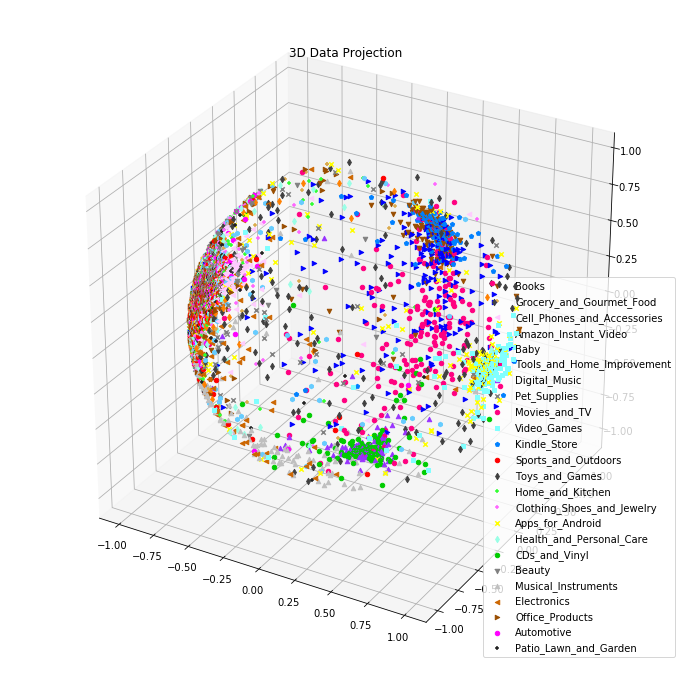

In [32]:
from sklearn.preprocessing import normalize

#RENAMED FOR EASE
X = normalize(corpus_tfidf_kpca)

#CREATE DICTIONARY TO ASSIGN COLORS
categories = df.ix[:,1].unique()

#REINDEX OUTPUT TO COMPARE WITH LABELS
reindexed = df.ix[:,1].reset_index()

#CREATE DICTIONARY TO ASSIGN VALUES TO OCCURRENCE VECTOR AND COLORS
together = zip(categories,np.arange(0,24))
locator = dict(together)
occurred =  np.zeros(24)

reds = [1, 0.6, 0.86, 1, 0,0.4,  1,0.6,0.5,  1,0.5,  0,0.25,0.2,  1,1,0.6,  0,0.5,0.75,0.8,0.6,1,0.13]
greens =[0,0.3, 0.67,0.8,0,0.8,0.5,0.2,0.5,  0,  1,0.5,0.25,  1,0.4,1,  1,0.8,0.5,0.75,0.4,0.3,0,0.13]
blues = [0, 0, 0.3, 1,   1,  1,  0,  1,0.5,0.5,  1,  1,0.25,0.2,  1,0,0.9,  0,0.5,0.75,  0,  0,1,0.13]   

markers = ['o', 'v', '+', '<', '>', 'h', 'd', '^', 'x', 'o', 's', 'p', 'd', '+', '+', 'x', 'd','o', 'v',\
           '^', '<', '>', 'o', '+' ]
colors = pd.DataFrame(reds, columns = ['Reds'])
colors['Greens'] = greens
colors['Blues'] = blues

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

for i in range(1,len(reindexed)):

    index = locator[reindexed.ix[i,1]]
    
    if(occurred[locator[reindexed.ix[i,1]]] == 0):
        
    
        occurred[locator[reindexed.ix[i,1]]] = 1
        ax.scatter(X[i,0], X[i,1], X[i,2], color = colors.ix[index,:], label = reindexed.ix[i,1], marker=markers[index])
        
    else:
        #NO LABEL IF ALREADY EXISTING
        ax.scatter(X[i,0], X[i,1], X[i,2], color = colors.ix[index,:],marker=markers[index])
        
plt.legend()
plt.title("3D Data Projection")
plt.show()

After this visual inspection we wanted to see if the 'variance explained' graph had the elbow shape that could help us finding the best number of features to keep after the dimensionality reduction.

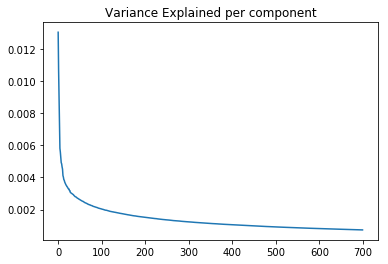

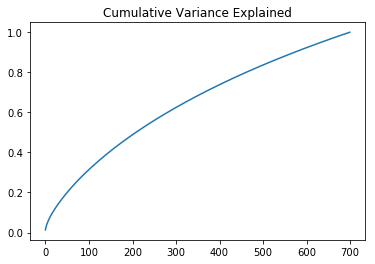

In [33]:
from sklearn.decomposition import KernelPCA
import numpy as np
reducer= KernelPCA(n_components = 700 , kernel="cosine", random_state=seed)
corpus_tfidf_kpca = reducer.fit_transform(sparse_corpus_tfidf_transpose)

# np.var does not accept as inputs sparse matrixes so we approximated the total variance 
# with the variance of the first 700 principal components, this will not be the exact
# amount of explained variance but what we are interested about is the shape of the curve.
explained_variance = np.var(corpus_tfidf_kpca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

cum_explained_variance=np.cumsum(explained_variance_ratio)

plt.figure()
plt.plot(explained_variance_ratio)
plt.title('Variance Explained per component')

plt.figure()
plt.plot(cum_explained_variance)
plt.title('Cumulative Variance Explained')

The explained variance per component decays rapidly for the first components and we can clearly see the 'L' shape. However, for a large number of components it does not approach zero very rapidly: as it is shown in the second plot the cumulative explained variance grows very slowly.<br>
A dimenionality reduction is needed by several of the models to reduce the computational burden and to get rid of some noise in the data. Following the thumb rule of looking for the elbow in the plot we chose 100, we are not sure that limiting our analysis to those components will exclude mostly noise and not relevant information though. We will discuss this matter further when we start testing some methods.